### NLP Week 3: Soup

In [ ]:
import nltk
from urllib.request import urlopen

In [ ]:
url = ("https://www.linkedin.com/pulse/top-companies-2021-50-best-workplaces-grow-your-career-us-/?published=t?trk=eml-mktg-bcs-top-companies-2021-employee&src=e-eml&mcid=6783440793798537216")

In [ ]:
bestWorkPlaces = urlopen(url).read()

In [ ]:
bestWorkPlaces

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url_text = BeautifulSoup(urlopen(url)).get_text()

In [ ]:
url_text

In [ ]:
start = url_text.find("Top Companies 2021: The 50 best workplaces to grow your career in the U.S")

In [ ]:
end = url_text.find("Published ByLinkedIn News5,493,536")

In [ ]:
last_sent = len("Published ByLinkedIn News5,493,536")

In [ ]:
intro = url_text[start:end+last_sent]

#### Sentiment Analysis Intro

    1) + * + == + very good
    2) - * - == + not bad
    3) - * + == - not good
    

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
neg_sample = "neg_sample.csv"
pos_sample = "positive_sample.csv"

# Reference for data: https://gist.github.com/mkulakowski2/4289437

In [ ]:
neg_df = pd.read_csv(neg_sample)
neg_df.columns = ["negative"]

In [ ]:
pos_df = pd.read_csv(pos_sample)


In [ ]:
pos_df.head()

In [ ]:
neg_df.head()

In [ ]:
neg_list = neg_df.values.tolist()
pos_list = pos_df.values.tolist()

In [ ]:
def sentiment(text):
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        sent_word = pd.DataFrame(sent_words)
        sent_word.columns = ["sent_words"]
        print(sent_word)
        for k in range(0, len(sent_word)):
            for index, word in sent_word.iterrows():
                for i in range(0, len(pos_df)):
                    for index, row in pos_df.iterrows():
#                         print(word[k] + " " + row[i])
                        if word[k] == row[k]:
                            p_count +=1
                    for index, row in neg_df.iterrows():
                        if word[k] == row[i]:
                            n_count +=1
        if p_count > 0 and n_count == 0:
            print("+ : " + sentence)
        elif n_count%2 > 0:
            print("-: " + sentence)
        elif n_count%2 == 0 and n_count > 0:
            print("+: " + sentence)
        else:
            print("?: " + sentence)

In [ ]:
def sentiment(text):
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in pos_list:
                if word == item:
                    p_count +=1
            for item in neg_list:
                if word == item:
                    n_count +=1
    if p_count > 0 and n_count == 0:
        print("+ : " + sentence)
    elif n_count%2 > 0:
        print("-: " + sentence)
    elif n_count%2 == 0 and n_count > 0:
        print("+: " + sentence)
    else:
        print("?: " + sentence)

In [ ]:
sentiment("a+")

# Named Entity Recognition

Entity Annotations
Doc.ents are token spans with their own set of annotations.


In [44]:
from IPython.display import Image


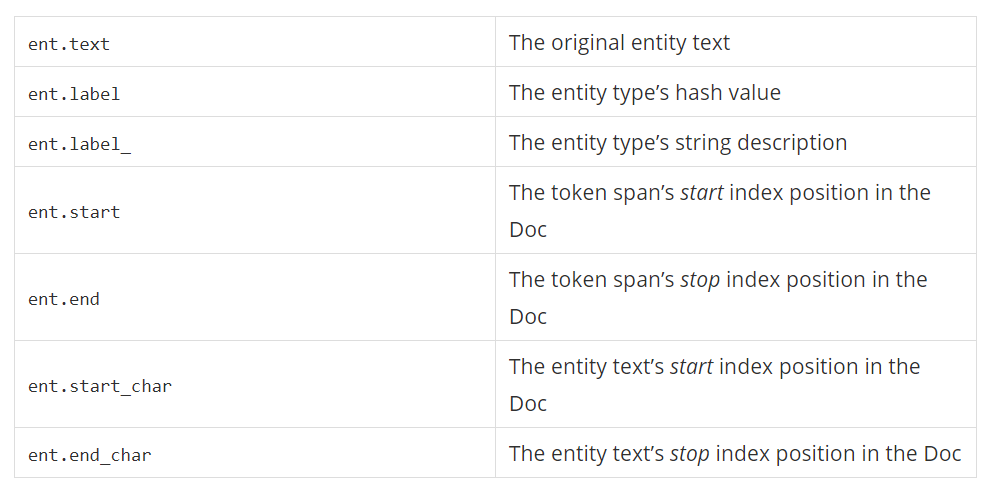

In [47]:
Image(filename='notebookImages/entitiesDoc.png')


In [2]:
import spacy

In [11]:
nlp = spacy.load('en_core_web_sm')

In [12]:
# !python -m spacy download en_core_web_sm 

In [16]:
def show_entity(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
    else:
        print("No entities found!")

In [21]:
doc = nlp("I love New York.New York has technology companies like Apple, Microsoft")

In [22]:
show_entity(doc)

New York - GPE - Countries, cities, states
New York - GPE - Countries, cities, states
Apple - ORG - Companies, agencies, institutions, etc.
Microsoft - ORG - Companies, agencies, institutions, etc.


In [28]:
doc = nlp("Teach Toddlers Tech is an amazing book. Please grab a copy, Thank you!")

In [29]:
show_entity(doc)

Teach Toddlers Tech - ORG - Companies, agencies, institutions, etc.


In [23]:
# create custom tags with spacy
from spacy.tokens import Span

In [24]:
ORG = doc.vocab.strings[u"ORG"]

In [25]:
ORG

383

In [31]:
# Adding a single named entity
newEntity = Span(doc, 0, 1, label=ORG) #start index and ned
doc.ents = list(doc.ents) + [newEntity]

In [34]:
# Multiple named entity
from spacy.matcher import PhraseMatcher

In [32]:
doc = nlp("Teach Toddler Tech is a series and the subtitle of our first book is pair programming. We all know the importance of pair-programming")

In [33]:
show_entity(doc)

Teach Toddler Tech - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.


In [35]:
matcher = PhraseMatcher(nlp.vocab)

In [36]:
phraseList = ['pair programming', 'pair-programming']

In [37]:
phrasePattern = [nlp(text) for text in phraseList]

In [38]:
matcher.add("subTitle", None, *phrasePattern)

In [39]:
foundMatches = matcher(doc)

In [40]:
foundMatches

[(743624500533919614, 14, 16), (743624500533919614, 23, 26)]

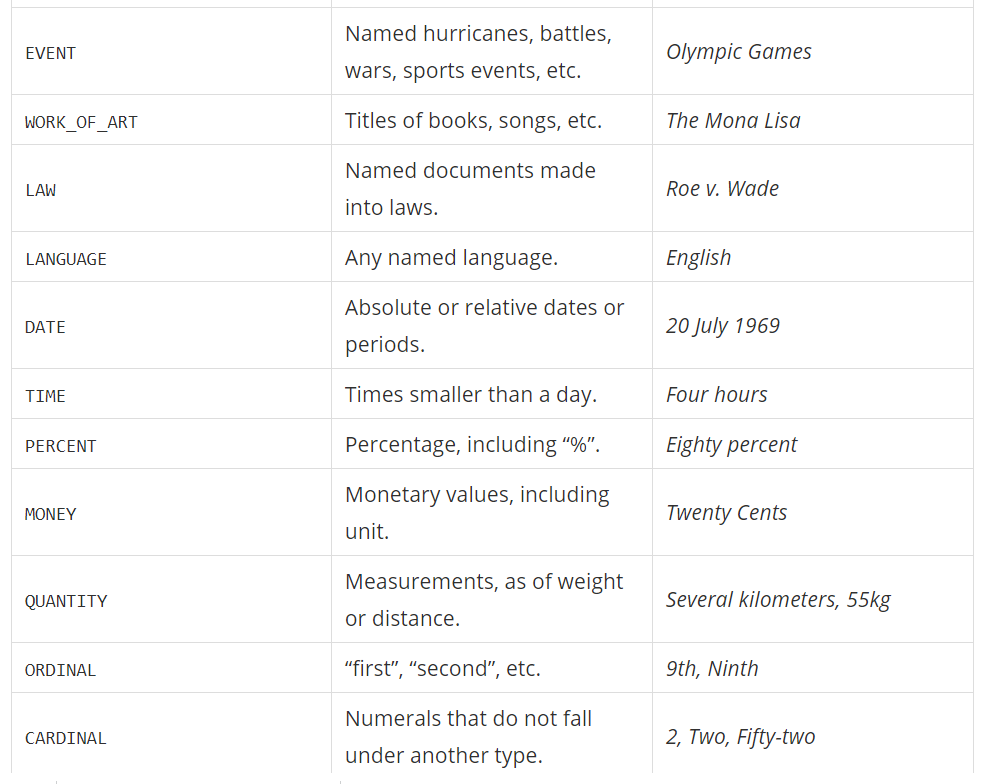

In [61]:
Image(filename='notebookImages/parts2.png')

In [62]:
bookSubTitle = doc.vocab.strings["WORK_OF_ART"]

In [69]:
newEntity = [Span(doc, match[1], match[2], label=bookSubTitle) for match in foundMatches]

In [73]:
doc.ents = list(doc.ents) + newEntity #Add our new entity

In [74]:
show_entity(doc)

Teach Toddler Tech - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.
pair programming - WORK_OF_ART - Titles of books, songs, etc.
pair-programming - WORK_OF_ART - Titles of books, songs, etc.


In [79]:
"""
Find the number of times an entity appears in a doc
"""
entity = [entity for entity in doc.ents if entity.label_ == 'WORK_OF_ART']

In [80]:
entity

[pair programming, pair-programming]

In [81]:
len(entity)

2

## Visualize NER

In [82]:
from spacy import displacy

In [95]:
doc = nlp("Over the last three weeks, we have sold over 50 copies of our Teach Toddlers Tech: pair programming book."
        u" You all are amazing!!! Please grab a copy")

In [96]:
displacy.render(doc, style='ent', jupyter=True)

In [92]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent',jupyter=True )
    

/Users/princessiria/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [101]:
colors = {'ORG':'yellow'}
options = {'ents':['ORG'], 'colors':colors}

In [ ]:
displacy.render(doc, style='ent', jupyter=True, options=options)

In [103]:
colors = {'ORG':'radial-gradient(yellow, orange)'} 
#can also use hex color code #4287f5 or linear-gradient(45deg, pink, yello)
options = {'ents':['ORG'], 'colors':colors}

In [104]:
displacy.render(doc, style='ent', jupyter=True, options=options)

In [105]:
displacy.serve(doc, style='ent', options=options)

/Users/princessiria/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [04/May/2021 15:16:08] "GET / HTTP/1.1" 200 905
127.0.0.1 - - [04/May/2021 15:16:09] "GET /favicon.ico HTTP/1.1" 200 905


Shutting down server on port 5000.
